In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice

## Accuracy

In [2]:
df_train = pd.read_csv("./PCP_Acc_Train_Only.csv").iloc[:9]
df_train_test = pd.read_csv("./PCP_Acc_Train_Test.csv").iloc[:9]

In [3]:
df_train

,Layer,PROMPT1_ACC,PROMPT2_ACC,PROMPT3_ACC,PROMPT4_ACC,PROMPT5_ACC,PROMPT6_ACC,PROMPT7_ACC,PROMPT8_ACC,PROMPT9_ACC,PROMPT10_ACC,OVERALL
0,0.0,0.371,0.000,1.000,0.172,0.966,0.413,0.000,0.267,0.229,0.965,0.4383
1,1.0,0.000,0.464,0.536,0.500,0.632,0.000,0.000,0.000,0.000,0.988,0.3120
2,2.0,0.000,0.535,0.433,0.366,0.598,0.000,0.000,0.000,0.258,0.872,0.3062
3,3.0,0.285,0.257,0.398,0.000,0.723,0.502,0.247,0.000,0.246,0.863,0.3521
4,4.0,0.000,0.000,0.879,0.599,0.747,0.290,0.000,0.000,0.214,0.979,0.3708
5,5.0,0.000,0.000,0.965,0.403,0.764,0.511,0.000,0.000,0.182,0.955,0.3780
6,6.0,0.367,0.000,0.988,0.178,0.425,0.356,0.000,0.000,0.368,0.956,0.3638
7,7.0,0.000,0.684,0.982,0.000,0.425,0.000,0.000,0.268,0.362,0.628,0.3349
8,8.0,0.000,0.344,0.634,0.191,0.401,0.129,0.000,0.118,0.000,0.296,0.2113


In [4]:
df_train_test

,Layer,PROMPT1_ACC_TRAIN,PROMPT1_ACC_TEST,PROMPT2_ACC_TRAIN,PROMPT2_ACC_TEST,PROMPT3_ACC_TRAIN,PROMPT3_ACC_TEST,PROMPT4_ACC_TRAIN,PROMPT4_ACC_TEST,PROMPT5_ACC_TRAIN,...,PROMPT7_ACC_TRAIN,PROMPT7_ACC_TEST,PROMPT8_ACC_TRAIN,PROMPT8_ACC_TEST,PROMPT9_ACC_TRAIN,PROMPT9_ACC_TEST,PROMPT10_ACC_TRAIN,PROMPT10_ACC_TEST,OVERALL_TRAIN,OVERALL_TEST
0,0.0,0.38375,0.300,0.24625,0.285,0.77750,0.730,0.16875,0.130,0.58125,...,0.00000,0.00,0.260,0.295,0.18750,0.215,0.62625,0.570,0.374000,0.3600
1,1.0,0.26375,0.280,0.27500,0.225,0.27250,0.295,0.42875,0.375,0.72000,...,0.00000,0.00,0.000,0.000,0.20375,0.215,0.85500,0.825,0.318875,0.3100
2,2.0,0.28000,0.305,0.26500,0.205,0.52125,0.530,0.00000,0.000,0.90375,...,0.00000,0.00,0.000,0.000,0.24000,0.290,0.98000,0.990,0.368625,0.3735
3,3.0,0.29750,0.310,0.00000,0.000,0.64750,0.665,0.00000,0.000,0.92500,...,0.00000,0.00,0.000,0.000,0.23500,0.280,0.97500,0.990,0.385250,0.3965
4,4.0,0.29750,0.310,0.32875,0.280,0.89375,0.890,0.00000,0.000,0.41625,...,0.00000,0.00,0.000,0.000,0.22250,0.280,0.98000,0.990,0.365875,0.3725
5,5.0,0.00000,0.000,0.00000,0.000,0.97750,0.965,0.33750,0.325,0.76750,...,0.00000,0.00,0.000,0.000,0.22750,0.255,0.97625,0.985,0.373875,0.3700
6,6.0,0.31375,0.330,0.00000,0.000,0.98125,0.970,0.34125,0.350,0.41500,...,0.00000,0.00,0.000,0.000,0.21750,0.275,0.81000,0.825,0.364750,0.3740
7,7.0,0.21250,0.135,0.20625,0.200,0.84625,0.815,0.18500,0.160,0.42375,...,0.00000,0.00,0.000,0.000,0.00000,0.000,0.93125,0.950,0.341375,0.3300
8,8.0,0.16750,0.095,0.11000,0.065,0.54250,0.515,0.00000,0.000,0.40500,...,0.21875,0.23,0.125,0.110,0.22000,0.240,0.55250,0.505,0.251500,0.2385


In [5]:
train_test_train_vals = df_train_test.iloc[:, df_train_test.columns.str.contains("TRAIN")]
train_test_test_vals = df_train_test.iloc[:, df_train_test.columns.str.contains("TEST")]

In [6]:
train_test_train_vals.columns

Index(['PROMPT1_ACC_TRAIN', 'PROMPT2_ACC_TRAIN', 'PROMPT3_ACC_TRAIN',
       'PROMPT4_ACC_TRAIN', 'PROMPT5_ACC_TRAIN', 'PROMPT6_ACC_TRAIN',
       'PROMPT7_ACC_TRAIN', 'PROMPT8_ACC_TRAIN', 'PROMPT9_ACC_TRAIN',
       'PROMPT10_ACC_TRAIN', 'OVERALL_TRAIN'],
      dtype='object')

In [7]:
train_test_test_vals.columns

Index(['PROMPT1_ACC_TEST', 'PROMPT2_ACC_TEST', 'PROMPT3_ACC_TEST',
       'PROMPT4_ACC_TEST', 'PROMPT5_ACC_TEST', 'PROMPT6_ACC_TEST',
       'PROMPT7_ACC_TEST', 'PROMPT8_ACC_TEST', 'PROMPT9_ACC_TEST',
       'PROMPT10_ACC_TEST', 'OVERALL_TEST'],
      dtype='object')

Text(0.5, 0, 'Layer')

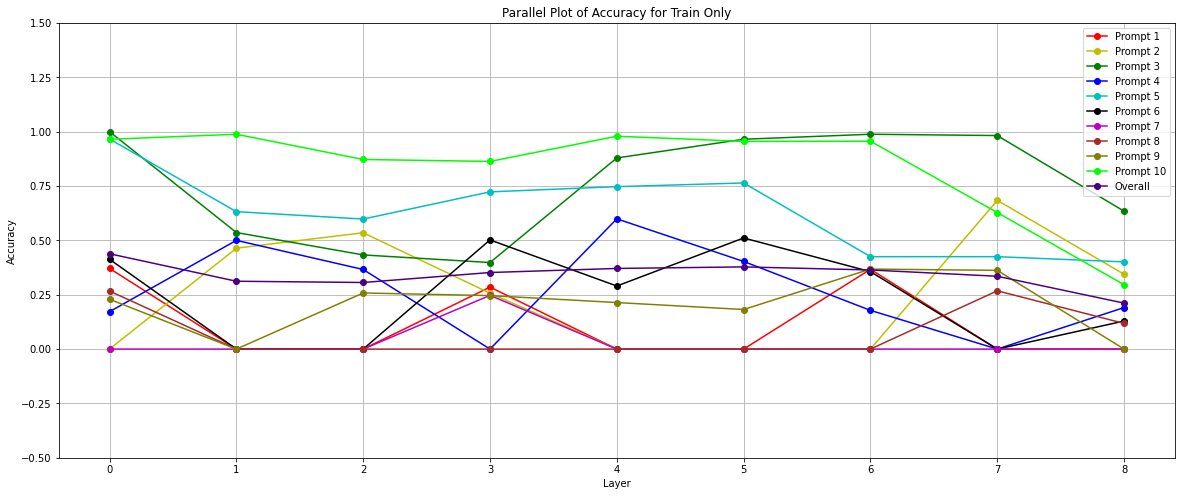

In [8]:
df = df_train.drop(columns = ["Layer"])

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
legend.append("Overall")
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Accuracy for Train Only")
plt.ylabel("Accuracy")
plt.xlabel("Layer")

Text(0.5, 0, 'Layer')

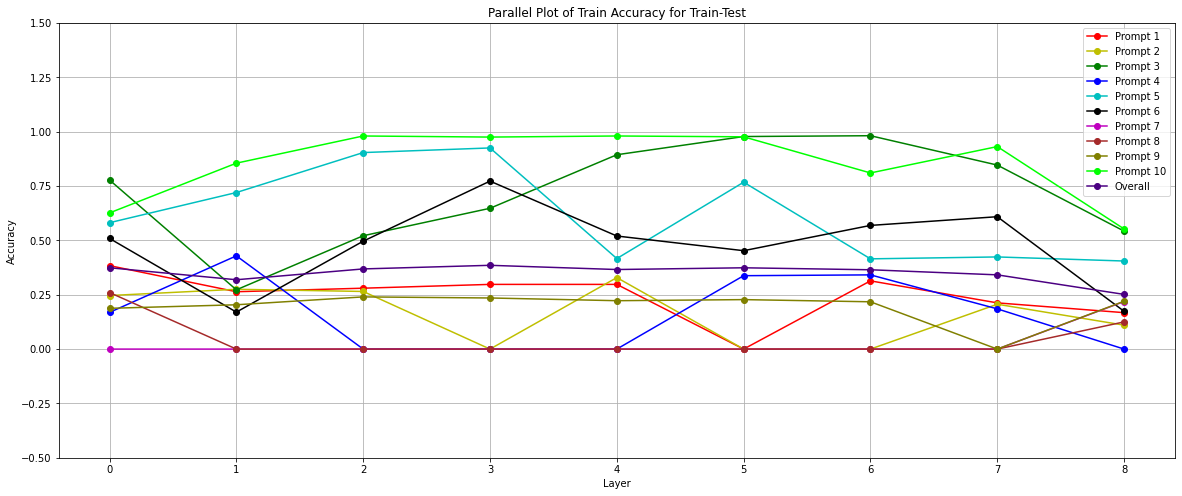

In [9]:
df = train_test_train_vals

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
legend.append("Overall")
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Train Accuracy for Train-Test")
plt.ylabel("Accuracy")
plt.xlabel("Layer")

Text(0.5, 0, 'Layer')

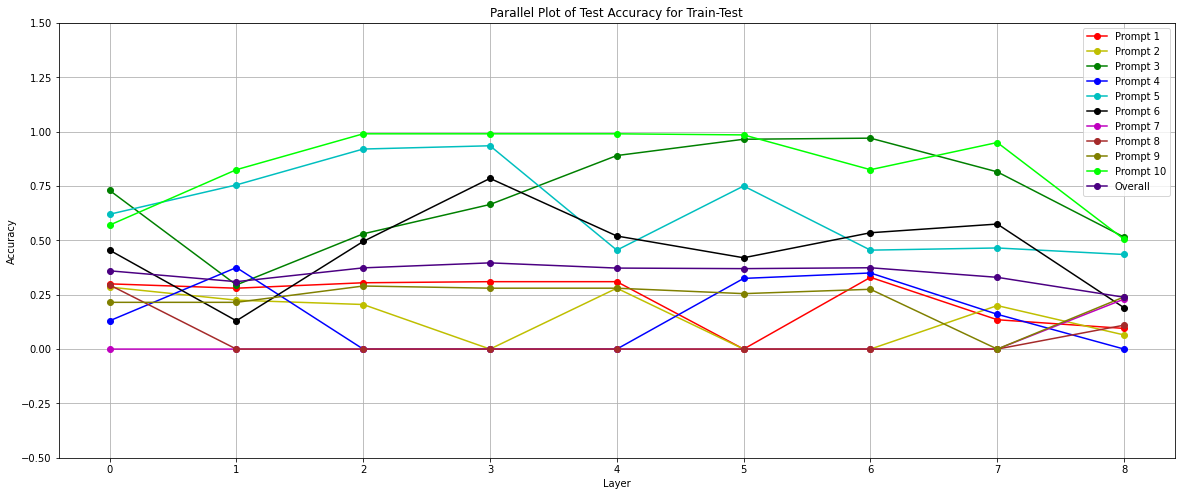

In [10]:
df = train_test_test_vals

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
legend.append("Overall")
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Test Accuracy for Train-Test")
plt.ylabel("Accuracy")
plt.xlabel("Layer")

## Precision

In [11]:
df_prec_train = pd.read_csv("./PCP_Precision_TRAIN.csv").iloc[:9]
df_prec_test = pd.read_csv("./PCP_Precision_TEST.csv").iloc[:9]

In [12]:
df_prec_train

,Layer,PROMPT_1,PROMPT_2,PROMPT_3,PROMPT_4,PROMPT_5,PROMPT_6,PROMPT_7,PROMPT_8,PROMPT_9,PROMPT_10
0,0,0.117850,0.447727,1.000000,0.409091,0.646732,0.224614,0.000000,0.301449,0.533808,1.000000
1,1,0.220021,0.231579,0.349920,0.200234,0.320356,0.277551,0.000000,0.000000,0.211964,0.979943
2,2,0.228805,0.200000,0.825743,0.000000,0.349444,0.203903,0.000000,0.000000,0.308186,0.959608
3,3,0.234483,0.000000,0.988550,0.000000,0.362390,0.204568,0.000000,0.000000,0.312812,0.978670
4,4,0.230844,0.167730,0.564771,0.000000,0.378840,0.206862,0.000000,0.000000,0.393805,0.988651
5,5,0.000000,0.000000,1.000000,0.188811,0.384230,0.198139,0.000000,0.000000,0.137983,0.748084
6,6,0.237915,0.000000,1.000000,0.194583,0.404878,0.188718,0.000000,0.000000,0.510264,0.546835
7,7,0.141196,0.150961,0.710388,0.339450,0.548544,0.165029,0.000000,0.000000,0.000000,1.000000
8,8,0.118794,0.126984,1.000000,0.000000,0.690832,0.158314,0.170565,0.171821,0.112245,0.361702


In [13]:
df_prec_test

,Layer,PROMPT_1,PROMPT_2,PROMPT_3,PROMPT_4,PROMPT_5,PROMPT_6,PROMPT_7,PROMPT_8,PROMPT_9,PROMPT_10
0,0,0.092593,0.504425,1.000000,0.346667,0.708571,0.191579,0.000000,0.331461,0.565789,1.000000
1,1,0.219608,0.190678,0.351190,0.181598,0.342404,0.216667,0.000000,0.000000,0.218274,0.970588
2,2,0.229323,0.162698,0.898305,0.000000,0.357977,0.207113,0.000000,0.000000,0.343195,0.975369
3,3,0.228782,0.000000,0.985185,0.000000,0.372510,0.214774,0.000000,0.000000,0.354430,0.975369
4,4,0.231343,0.148148,0.591362,0.000000,0.406250,0.208417,0.000000,0.000000,0.434109,0.985075
5,5,0.000000,0.000000,1.000000,0.185185,0.401070,0.179872,0.000000,0.000000,0.144476,0.751908
6,6,0.234875,0.000000,1.000000,0.202312,0.437500,0.179832,0.000000,0.000000,0.528846,0.606618
7,7,0.103448,0.135135,0.699571,0.316832,0.632653,0.148964,0.000000,0.000000,0.000000,1.000000
8,8,0.067857,0.070270,1.000000,0.000000,0.743590,0.182692,0.162544,0.161765,0.116788,0.364621


Text(0.5, 0, 'Layer')

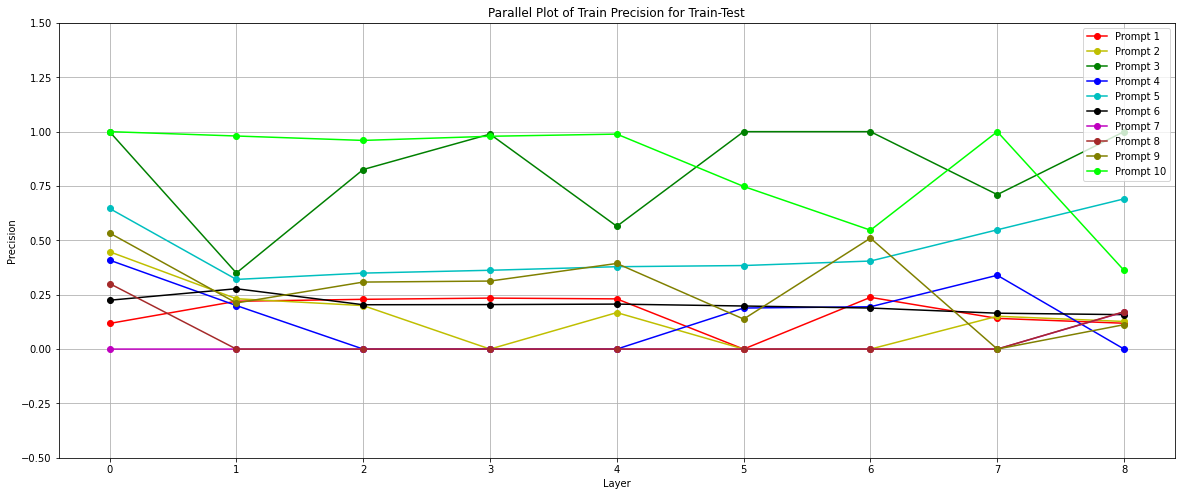

In [14]:
df = df_prec_train.drop(columns = ["Layer"])

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Train Precision for Train-Test")
plt.ylabel("Precision")
plt.xlabel("Layer")

Text(0.5, 0, 'Layer')

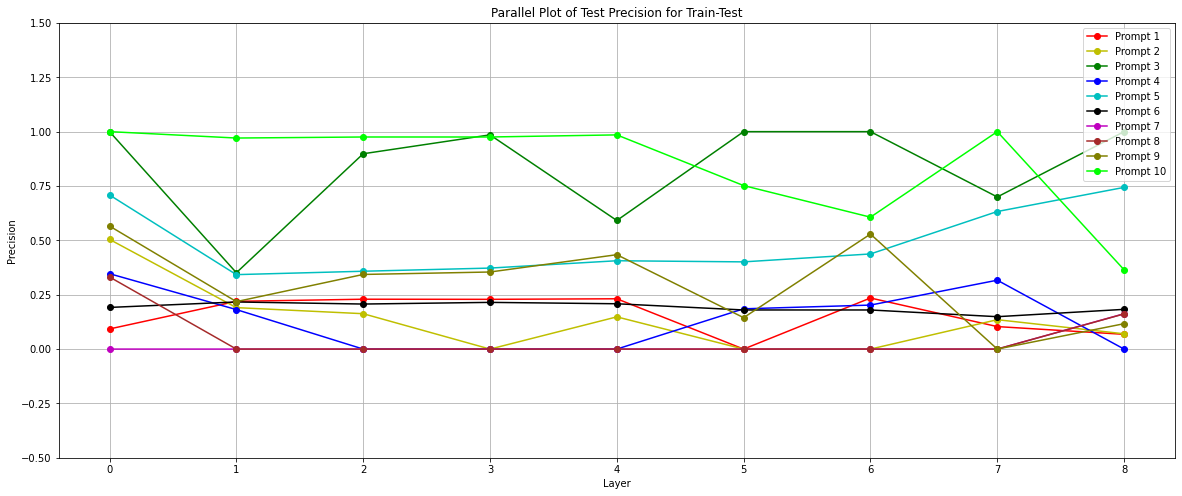

In [15]:
df = df_prec_test.drop(columns = ["Layer"])

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Test Precision for Train-Test")
plt.ylabel("Precision")
plt.xlabel("Layer")

## Recall

In [16]:
df_recall_train = pd.read_csv("./PCP_Recall_TRAIN.csv").iloc[:9]
df_recall_test = pd.read_csv("./PCP_Recall_TEST.csv").iloc[:9]

In [17]:
df_recall_train

,Layer,PROMPT_1,PROMPT_2,PROMPT_3,PROMPT_4,PROMPT_5,PROMPT_6,PROMPT_7,PROMPT_8,PROMPT_9,PROMPT_10
0,0,0.38375,0.24625,0.77750,0.16875,0.58125,0.50875,0.00000,0.260,0.18750,0.62625
1,1,0.26375,0.27500,0.27250,0.42875,0.72000,0.17000,0.00000,0.000,0.20375,0.85500
2,2,0.28000,0.26500,0.52125,0.00000,0.90375,0.49625,0.00000,0.000,0.24000,0.98000
3,3,0.29750,0.00000,0.64750,0.00000,0.92500,0.77250,0.00000,0.000,0.23500,0.97500
4,4,0.29750,0.32875,0.89375,0.00000,0.41625,0.52000,0.00000,0.000,0.22250,0.98000
5,5,0.00000,0.00000,0.97750,0.33750,0.76750,0.45250,0.00000,0.000,0.22750,0.97625
6,6,0.31375,0.00000,0.98125,0.34125,0.41500,0.56875,0.00000,0.000,0.21750,0.81000
7,7,0.21250,0.20625,0.84625,0.18500,0.42375,0.60875,0.00000,0.000,0.00000,0.93125
8,8,0.16750,0.11000,0.54250,0.00000,0.40500,0.17375,0.21875,0.125,0.22000,0.55250


In [18]:
df_recall_test

,Layer,PROMPT_1,PROMPT_2,PROMPT_3,PROMPT_4,PROMPT_5,PROMPT_6,PROMPT_7,PROMPT_8,PROMPT_9,PROMPT_10
0,0,0.300,0.285,0.730,0.130,0.620,0.455,0.00,0.295,0.215,0.570
1,1,0.280,0.225,0.295,0.375,0.755,0.130,0.00,0.000,0.215,0.825
2,2,0.305,0.205,0.530,0.000,0.920,0.495,0.00,0.000,0.290,0.990
3,3,0.310,0.000,0.665,0.000,0.935,0.785,0.00,0.000,0.280,0.990
4,4,0.310,0.280,0.890,0.000,0.455,0.520,0.00,0.000,0.280,0.990
5,5,0.000,0.000,0.965,0.325,0.750,0.420,0.00,0.000,0.255,0.985
6,6,0.330,0.000,0.970,0.350,0.455,0.535,0.00,0.000,0.275,0.825
7,7,0.135,0.200,0.815,0.160,0.465,0.575,0.00,0.000,0.000,0.950
8,8,0.095,0.065,0.515,0.000,0.435,0.190,0.23,0.110,0.240,0.505


Text(0.5, 0, 'Layer')

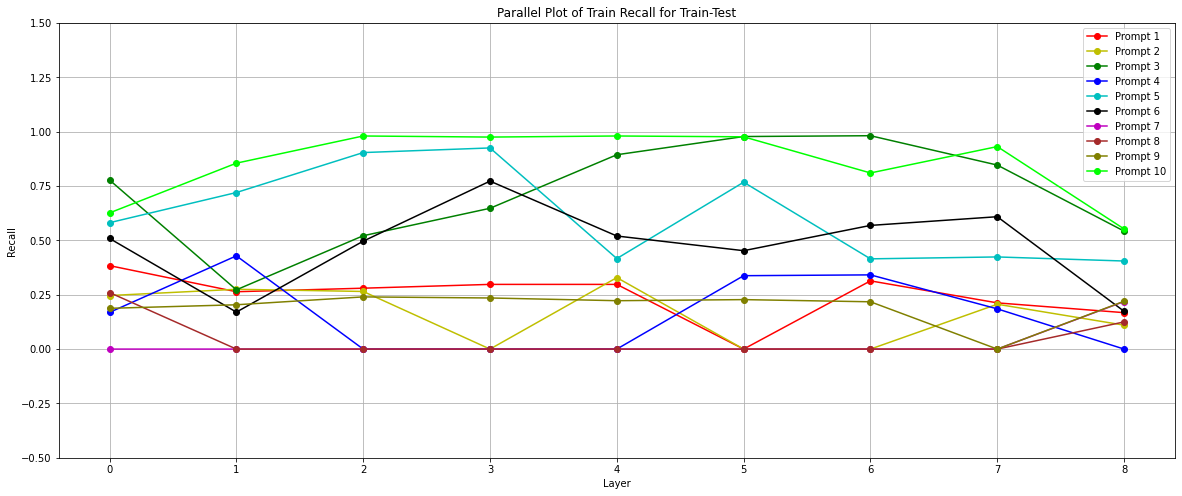

In [19]:
df = df_recall_train.drop(columns = ["Layer"])

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Train Recall for Train-Test")
plt.ylabel("Recall")
plt.xlabel("Layer")

Text(0.5, 0, 'Layer')

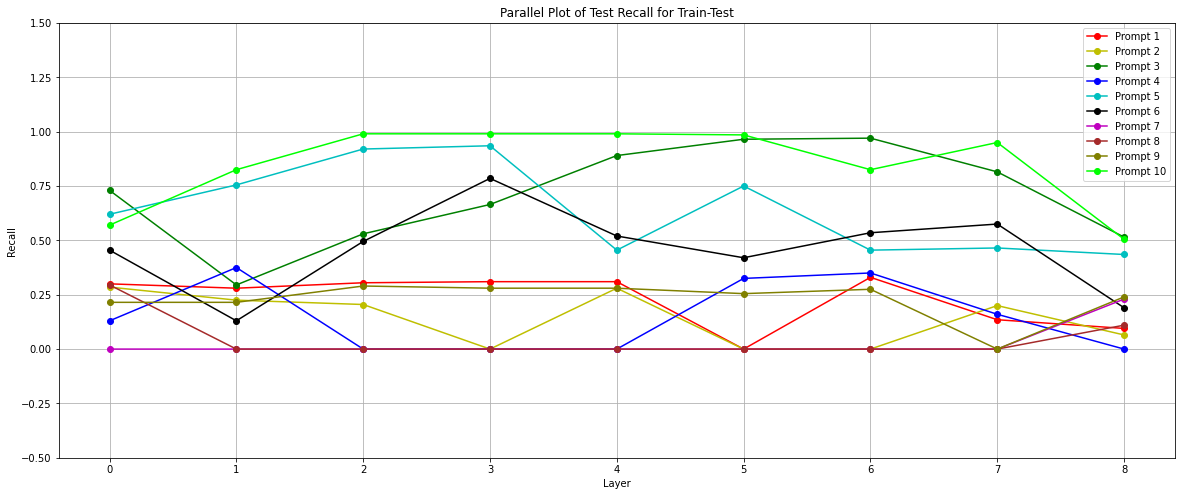

In [20]:
df = df_recall_test.drop(columns = ["Layer"])

ylim=[-0.5,+1.5]
figsize=(20,8)
my_colors = list(islice(cycle(['r', 'y', 'g', 'b', 'c', 'k', 'm', 'brown', 'olive', 'lime', 'indigo']), None, 11))
plt.figure(figsize=figsize).gca().axes.set_ylim(ylim)
legend = [f"Prompt {i}" for i in range(1, 11)]
labels = [f"{i}" for i in range(9)]
for i in range(len(df.columns)):
    values = df.iloc[:, i].tolist()
    plt.plot(labels, values, marker="o", color=my_colors[i])
plt.legend(legend)
plt.grid(True)
plt.title("Parallel Plot of Test Recall for Train-Test")
plt.ylabel("Recall")
plt.xlabel("Layer")